In [2]:
import torch
from torch import nn # nn contaisn all the of the pytorchs building blocks for creatin a neural network
import matplotlib.pyplot as plt

#Check the pytorch version

torch.__version__

'2.8.0+cu126'

## Data preparing and Loading

Data can be almost anything.

* Excel Sheets
* Images of any kind
* Videos, Audious 
* Dna
* Text

Machine Learning is agame of two pairs 

 1. Get  Data into a numerical representation
 2. Build a model to learn patterns in that numerical data


Now lets create a model to represent a Linear Regression model 

In [3]:
#create known parameters
weight = 0.7 
bias  = 0.3

# create 

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim =1 )
X.shape
 
y = weight*X +bias

X[:10], y[:10], len(X), len(y)

# 
# 

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

# Spliting data into trianing and test sets 

lets create  atrainign and testing data

In [4]:
train_split = int(0.8*len(X))


train_split

X_train, Y_train = X[:train_split], y[:train_split]
X_test, Y_test = X[train_split:], y[train_split:]

In [5]:
# How might we better visualize our data 

def plot_predictions(train_data = X_train,
                     train_labels  = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions  = None                   
                     ):
    """Plots training data, test data and compares predictions"""
    
    plt.figure(figsize=(10,7))
    # plot trianing data in blue
    
    plt.scatter(train_data,train_labels, c="b" ,s = 4, label = "training data ")
    # plot trianing data in green
    plt.scatter(test_data,test_labels, c="g" ,s = 4, label = "testing data ")
    
    # Are there predictions?
    
    if predictions is not None:
        #plot the predicions if they exist
        plt.scatter(test_data,predictions, c="r", label = "Predicitons")
    
    #show legend
    
    plt.legend(prop={"size" : 14})
     

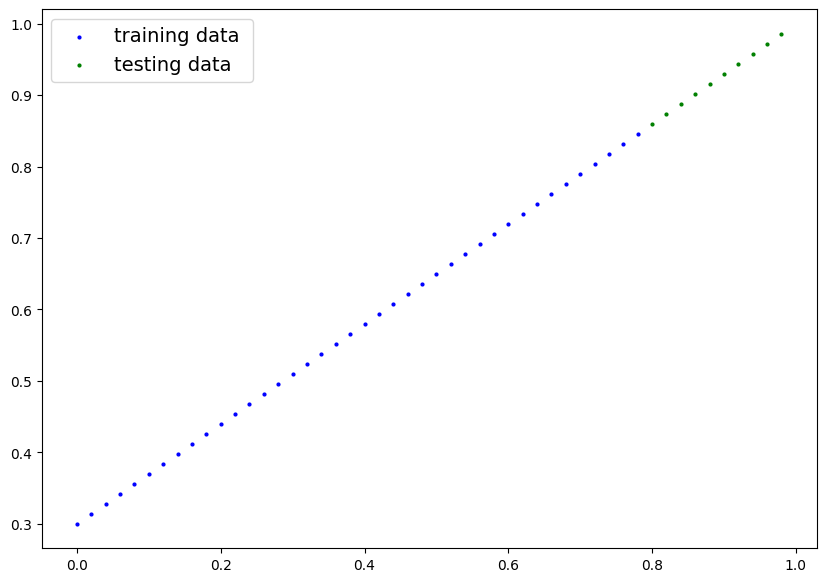

In [6]:
plot_predictions()

In [7]:
##2 . Build first pytorch model 

class LinearRegressionMOdel (nn.Module): ## almostr evryclas s in the pytoch inherites the nn.dulke class for build the model
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad = True,# this line is optional torch does it as default 
                                                dtype= torch.float32))
        self.bias = nn.Parameter(torch.randn(1,
                                                requires_grad = True,# this line is optional torch does it as default 
                                                dtype= torch.float32))
    ## Forward method is used to define the computation in the model 
    def forward(self, x: torch.Tensor) -> torch.Tensor: #<- x is the input data
        return  self.weights *x +self.bias  # this is nothing but the liunear regression model 
        
        

### Pytorch model building essentials 

* torch.nn - contains all of tyhe buyilding blocks for computational graphs (another word fo neural networks )
* torch.nn.Parameter -  what parameters shou8ld our model try and learn  , often a pytorch layer from torch.nn will set this for us 
* torch.nn.Module - the base class for all neural networkds modules, if you subclass you shooudl override the forward method
* torch.optim -  this wherre the optimizers in pytorch  live, they will help with the gradient descent 
* def forward() - a ll the nn.Module subclass requires you to override the method, this tell your model what to do 



### Checking the contents of our pytorch model 

Now we've created a model, let's  see what's inside our model 

so we can check what is inside our model using the .parameters() method


In [12]:
# create a random seed

torch.manual_seed(42)

# Create an instance of the class 

model = LinearRegressionMOdel()
model

#Check the parameters of  our model

list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# Another way of accessing the  parameter of the model is by using the state_dict()

model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making the model predictions using the torch.inference_mode()

to check our model's predictive power, lets s ee how weel its predicts 'y_test on X_test

when we pass the data in our model its runs it thourgh the forward method


In [14]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
#make predictions with models 

with torch.inference_mode():
    y_preds = model(X_test)
    
y_preds  

## you can do somethin similar uising the no_grad() but the infernce_mode() is more preferred 

# with torch.no_grad():
#    y_preds = model(X_test)



tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

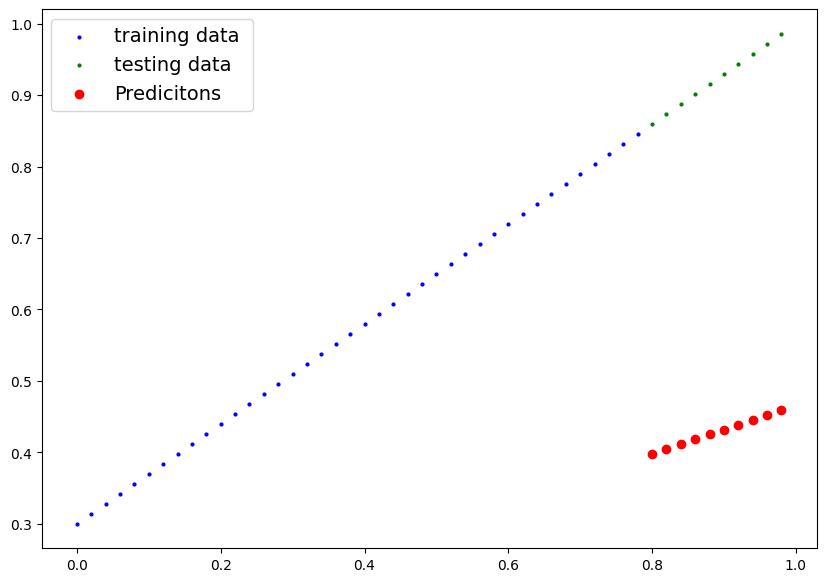

In [16]:
plot_predictions(predictions= y_preds)

### 3 Trian model 
The whole ida of training is for a model to move from some unknown parameters to some known parameters 

pr in other words bad representation to a good representation of the data 